## Week 3 
Q1: A company producing turning machines wants to adopt a new non-destructive testing procedure for the machines it produces. Each machine produced by the company is defective with probability .1. The company makes a profit of $10,000 from each non-defective machine, but loses $100,000 when it sells a defective machine. If a machine is non-defective, then it definitely passes the new testing procedure. On the other hand, if a machine is defective then it fails the new testing procedure with probability .8. 

(a) The goal of the company is to maximize the money it makes from each machine. The cost of the new testing procedure is $3,000 per machine. Use decision tree analysis to decide if the company should invest in the new testinig procedure. Show all your computations and draw the diagram. 
(b) What is the maximum amount that the company should be willing to pay for the new testing procedure? This is the value of the new testing procedure. 
(c) The new testing procedure can detect a defective machine with probability .8. Call this the power of the new testing procedure. Plot the value of the new testing procedure as a function of the its power. 

Expected value without testing: $19,000.00
Expected value with testing: $6,270.27
Decision: Do not invest in the new testing procedure.
Maximum price for testing: $0.00


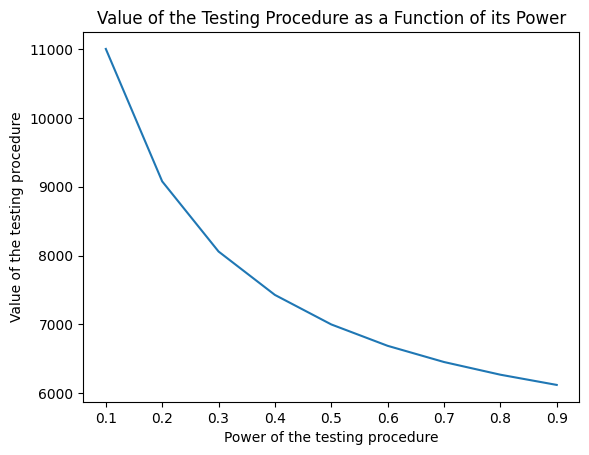

In [5]:
import numpy as np
import matplotlib.pyplot as plt

"""
This script analyzes the profitability of a new testing procedure for turning machines.
It calculates the expected value of a machine with and without testing,
determines the maximum price the company would be willing to pay for testing,
and plots the value of the testing procedure as a function of its power.
"""

def calculate_expected_value_no_test(profit_nondefective, loss_defective, prob_defective):
    """Calculates the expected value of a machine without testing.

    Args:
        profit_nondefective: Profit from a non-defective machine.
        loss_defective: Loss from a defective machine.
        prob_defective: Probability of a machine being defective.

    Returns:
        The expected value of a machine without testing.
    """
    if not 0 <= prob_defective <= 1:
        raise ValueError("Probability of defective machine must be between 0 and 1.")
    return profit_nondefective * (1 - prob_defective) + loss_defective * prob_defective

def calculate_expected_value_test(profit_nondefective, loss_defective, prob_defective, power, cost_testing):
    """Calculates the expected value of a machine with testing.

    Args:
        profit_nondefective: Profit from a non-defective machine.
        loss_defective: Loss from a defective machine.
        prob_defective: Probability of a machine being defective.
        power: Power of the new testing procedure (probability of detecting a defective machine).
        cost_testing: Cost of the new testing procedure.

    Returns:
        The expected value of a machine with testing.
    """
    if not 0 <= prob_defective <= 1 or not 0 <= power <= 1:
        raise ValueError("Probabilities must be between 0 and 1.")
    if cost_testing < 0:
        raise ValueError("Cost of testing cannot be negative.")
    expected_value_test_pass = profit_nondefective
    prob_fail_defective = 1 - power
    expected_value_test_fail = loss_defective * (prob_defective * prob_fail_defective) / (prob_defective * prob_fail_defective + (1 - prob_defective) * (1 - prob_fail_defective))
    expected_value_test = (1 - prob_defective) * expected_value_test_pass + prob_defective * expected_value_test_fail - cost_testing
    return expected_value_test

def calculate_expected_value_test_helper(params, power, cost_testing):
  """Helper function to calculate expected value with testing."""
  return calculate_expected_value_test(params['profit_nondefective'], params['loss_defective'], params['prob_defective'], power, cost_testing)

def print_results(expected_value_no_test, expected_value_test):
  """Prints the results of the analysis."""
  print("Expected value without testing: ${:,.2f}".format(expected_value_no_test))
  print("Expected value with testing: ${:,.2f}".format(expected_value_test))

  # Decision:
  if expected_value_test > expected_value_no_test:
      print("Decision: Invest in the new testing procedure.")
  else:
      print("Decision: Do not invest in the new testing procedure.")

def find_max_price(params, step_size):
  """Finds the maximum price for testing."""
  max_price = 0
  for price in np.arange(0, expected_value_no_test - step_size, step_size):
      try:
          expected_value_test = calculate_expected_value_test_helper(params, params['power'], price)
          if expected_value_test > expected_value_no_test:
              max_price = price
      except ValueError as e:
          raise
  return max_price

def plot_value_vs_power(params):
  """Plots the value of the testing procedure as a function of its power."""
  powers = np.linspace(0.1, 0.9, 9)
  values = []
  for power in powers:
      try:
          values.append(calculate_expected_value_test_helper(params, power, params['cost_testing']))
      except ValueError as e:
          raise
  plt.plot(powers, values)
  plt.xlabel("Power of the testing procedure")
  plt.ylabel("Value of the testing procedure")
  plt.title("Value of the Testing Procedure as a Function of its Power")
  plt.show()

# Define parameters
params = {
    'profit_nondefective': 10000,
    'loss_defective': 100000,
    'prob_defective': 0.1,
    'power': 0.8,
    'cost_testing': 3000
}

# Calculate expected values
try:
    expected_value_no_test = calculate_expected_value_no_test(params['profit_nondefective'], params['loss_defective'], params['prob_defective'])
    expected_value_test = calculate_expected_value_test_helper(params, params['power'], params['cost_testing'])
except ValueError as e:
    print(f"Error: {e}")
else:
  print_results(expected_value_no_test, expected_value_test)

  # Part (b): Finding the maximum price for testing
  step_size = 100
  try:
    max_price = find_max_price(params, step_size)
    print("Maximum price for testing: ${:,.2f}".format(max_price))
  except ValueError as e:
    print(f"Error: {e}")

  # Part (c): Plotting the value of the testing procedure
  try:
    plot_value_vs_power(params)
  except ValueError as e:
    print(f"Error: {e}")

Q2: A project consists of activities A, B, C, D, E, F, G. Both A and B start simltanuously. Activity C can start only after A finishes. Activities E and F can only start after both B and C finish. D can only start after B finishes.G can only start after D and E are complete. The time required to complete these activities are independent random variables, with duractions in the following list: A - Uniform(20, 32), B - Uniform(25,45), C - Exponential(8), D - Uniform(8,12), E - Uniform(8,12), F - Exponential(20), G - Exponential(10)

The parameter of the exponential distributions are the mean. Using a simulation compute the following 

(a) A 95% confidence interval for the expected time required to complete the project. 
(b) An estimate for a time T1 such that the project will be completed by T1 with probability .95. There is no need to give a confidence interval but explain how you determined T1. 
(c) An estimate for a time T2 such that the project will take longer than T2 with probability of .95. There is no need to give a confidence interval but explain how you determined T2. 

In [6]:
import numpy as np

# Define the number of simulations
num_simulations = 10000

# Define the activity duration distributions as a dictionary
activity_durations = {
    'A': lambda: np.random.uniform(20, 32),
    'B': lambda: np.random.uniform(25, 45),
    'C': lambda: np.random.exponential(8),
    'D': lambda: np.random.uniform(8, 12),
    'E': lambda: np.random.uniform(8, 12),
    'F': lambda: np.random.exponential(20),
    'G': lambda: np.random.exponential(10)
}

# Define the activity dependencies as a dictionary
activity_dependencies = {
    'C': ['A'], 
    'D': ['B'],
    'E': ['B', 'C'],
    'F': ['B', 'C'],
    'G': ['D', 'E']
}

# Create a function to simulate the project
def simulate_project(activity_durations, activity_dependencies):
    """Simulates the project and returns the completion time.

    Args:
        activity_durations (dict): A dictionary mapping activity names to functions 
                                     that generate random durations.
        activity_dependencies (dict): A dictionary mapping activity names to 
                                      lists of their prerequisite activities. 
    Returns:
        float: The project completion time.
    """
    finish_times = {} 
    
    for activity in activity_durations:
        finish_time = activity_durations[activity]()  # Get the duration
        # Add the finish times of any prerequisites
        if activity in activity_dependencies:
            for prerequisite in activity_dependencies[activity]:
                # Check if prerequisite exists in finish_times
                if prerequisite in finish_times:
                    finish_time += finish_times[prerequisite] 
                else:
                    print(f"Error: Prerequisite '{prerequisite}' for activity '{activity}' not found!")
                    return None # Indicate an error
        finish_times[activity] = finish_time

    return finish_times[max(finish_times, key=finish_times.get)] # Return the latest finish time


# Create a list to store the project completion times for each simulation
project_completion_times = []

# Run the simulations
for i in range(num_simulations):
    # Simulate the project and store the completion time
    project_completion_time = simulate_project(activity_durations, activity_dependencies)
    
    # Only append if simulation was successful 
    if project_completion_time is not None:
        project_completion_times.append(project_completion_time)

# Calculate the 95% confidence interval for the expected time required to complete the project
confidence_interval = np.percentile(project_completion_times, [2.5, 97.5])

# Calculate the time T1 such that the project will be completed by T1 with probability .95
T1 = np.percentile(project_completion_times, 95)

# Calculate the time T2 such that the project will take longer than T2 with probability of .95
T2 = np.percentile(project_completion_times, 5)

# Print the results
print("95% Confidence Interval for Expected Project Completion Time:", confidence_interval)
print("Time T1 for 95% Project Completion Probability:", T1)
print("Time T2 for 95% Project Overrun Probability:", T2)

95% Confidence Interval for Expected Project Completion Time: [104.22571182 175.46800558]
Time T1 for 95% Project Completion Probability: 167.64442920834708
Time T2 for 95% Project Overrun Probability: 107.73191586150242
